In [1]:
import pandas as pd, os, gc
import networkx as nx, matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import itertools

# Data Set up

In [2]:
# Download and save the lastfm_asia_edges.csv in the required format
# Download link: https://snap.stanford.edu/data/feather-lastfm-social.html
# Data source: 
    # Author: Benedek Rozemberczki and Rik Sarkar
    # Title: Characteristic Functions on Graphs: Birds of a Feather, from Statistical Descriptors to Parametric Models
    # Year: 2020
    
edges=pd.read_csv(r'data/lastfm_asia/lastfm_asia_edges.csv')
edges

,node_1,node_2
0,0,747
1,1,4257
2,1,2194
3,1,580
4,1,6478
...,...,...
27801,7488,7564
27802,7505,7579
27803,7533,7536
27804,7569,7587


In [2]:
edges = pd.read_csv(r'data/email_eu/email-Eu-core.txt', sep=' ')
edges = edges.rename(columns={'0':'node_1', '1':'node_2'})
edges

,node_1,node_2
0,2,3
1,2,4
2,5,6
3,5,7
4,8,9
...,...,...
25565,420,143
25566,174,859
25567,440,460
25568,52,786


In [2]:
# ## Download and save the congresslist.edgelist in the required format
# ## Download link : https://snap.stanford.edu/data/congress-twitter.html
# ## Data source: C.G. Fink, K. Fullin, G. Gutierrez, N. Omodt, S. Zinnecker, 
# ## G. Sprint, and S. McCulloch: A centrality measure for quantifying spread 
# ## on weighted, directed networks. Physica A, 2023.

# G = nx.read_edgelist('data/congress_network/congress.edgelist')

# transition_G = nx.google_matrix(G)
# transition_G=pd.DataFrame(transition_G)

# # Save to Matrix format in txt (transpose to make it column wise stochastic)
# transition_G.T.to_csv('data/matrix-congress.txt', sep=' ', index=True, header=False)

In [18]:
# import json
 
# Opening JSON file
f = open('data/lastfm_asia/lastfm_asia_features.json')
 
# returns JSON object as 
# a dictionary
nodes = json.load(f)

nodes=pd.DataFrame.from_dict(nodes, orient='index')
nodes.isna().sum()

# target=pd.read_csv('lastfm_asia/lastfm_asia_target.csv')
# target

0       173
1       206
2       225
3       233
4       243
       ... 
939    7623
940    7623
941    7623
942    7623
943    7623
Length: 944, dtype: int64

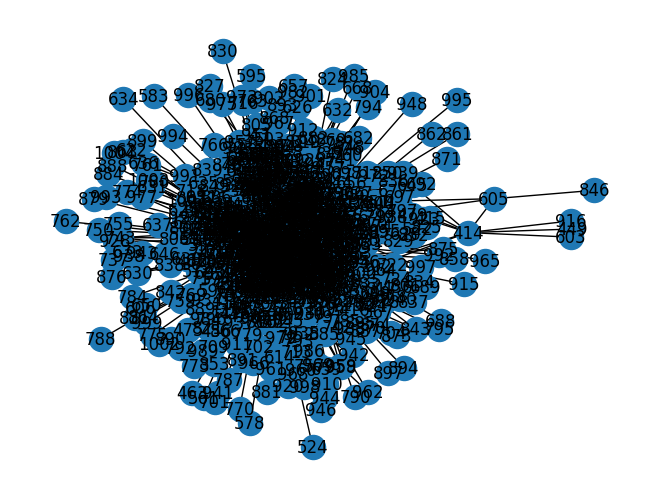

In [82]:
# TEST
G = nx.from_pandas_edgelist(edges, 'node_1', 'node_2')

# Visualize the graph
nx.draw(G, with_labels=True)
plt.show()

# Community

## Functions

In [3]:
def graph_community(G, community):
    # Visualize the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)

    # Assign community colors to nodes
    node_colors = []
    for node in G.nodes():
        for i, comm in enumerate(community):
            if node in comm:
                node_colors.append(i)
                break

    # Draw nodes with community colors
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.rainbow)

    # # Optionally, draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    plt.show()

In [4]:
def calculate_ratio_cut(graph, communities):
    total_cut_size = 0
    total_volume = 0

    # Calculate total cut size and total volume
    for community1, community2 in itertools.combinations(communities, 2):
        cut_size = nx.cut_size(graph, community1, community2)
        total_cut_size += cut_size

        volume1 = len(graph.subgraph(community1).edges())
        volume2 = len(graph.subgraph(community2).edges())
        total_volume += min(volume1, volume2)

    # Calculate ratio cut
    ratio_cut_value = total_cut_size / total_volume
    return ratio_cut_value

def get_metrics(G, community):
    """
    1. Modularity:
    Returns the modularity of the given partition of the graph.
    
    2. Partition Quality:
    The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.
    The performance of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges.
    --> returns (coverage, performance) tuple of the partition

    3. Ratio Cut
    The ratio of the number of edges between nodes in different communities to the total number of edges incident on nodes in the smaller of the two communities
    A lower ratio cut indicates a better partition.
    
    """
    # similarity metrics
    
    modularity = nx.algorithms.community.modularity(G, community)
    partion_quality = nx.algorithms.community.partition_quality(G, community) 
    ratio_cut = calculate_ratio_cut(G, community)

    # Ratio cut
    # ncut
    
    return {'modularity':modularity,
            'partition_quality':partion_quality,
            'ratio_cut': ratio_cut
#            'silhouette': silhouette
           }

In [36]:
nx.adjacency_matrix(G).shape[1]

C:\Users\Adina Bondoc\AppData\Local\Temp\ipykernel_15180\3460206156.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G).shape[1]


111

## Louvain

In [11]:
# G = nx.from_pandas_edgelist(edges, 'node_1', 'node_2')
louvain=nx.community.louvain_communities(G, seed=123)
louvain

[{15,
  45,
  46,
  97,
  98,
  99,
  100,
  101,
  124,
  125,
  139,
  140,
  164,
  185,
  216,
  269,
  272,
  273,
  274,
  300,
  322,
  323,
  334,
  335,
  353,
  354,
  371,
  428,
  429,
  446,
  447,
  448,
  461,
  579,
  592,
  617,
  618,
  638,
  640,
  657,
  662,
  676,
  687,
  708,
  709,
  735,
  760,
  768,
  770,
  794,
  819,
  838,
  891,
  892,
  896,
  929,
  933,
  935,
  937},
 {2,
  3,
  4,
  5,
  6,
  54,
  55,
  56,
  57,
  58,
  59,
  63,
  88,
  89,
  102,
  126,
  131,
  132,
  137,
  138,
  158,
  159,
  174,
  175,
  192,
  193,
  194,
  195,
  208,
  209,
  210,
  211,
  234,
  235,
  236,
  237,
  238,
  239,
  240,
  241,
  242,
  243,
  244,
  252,
  271,
  281,
  285,
  286,
  302,
  303,
  304,
  305,
  319,
  369,
  408,
  411,
  412,
  481,
  516,
  517,
  520,
  528,
  532,
  552,
  564,
  571,
  586,
  587,
  599,
  604,
  610,
  619,
  622,
  625,
  630,
  631,
  634,
  635,
  636,
  637,
  639,
  646,
  665,
  683,
  685,
  698,
  712,
  

In [7]:
len(louvain)

27

In [8]:
louvain_sum=pd.DataFrame([len(i) for i in louvain], columns=['n_nodes']).reset_index().rename(columns={'index':'community'})
louvain_sum

,community,n_nodes
0,0,59
1,1,143
2,2,94
3,3,68
4,4,139
5,5,1
6,6,121
7,7,1
8,8,1
9,9,1


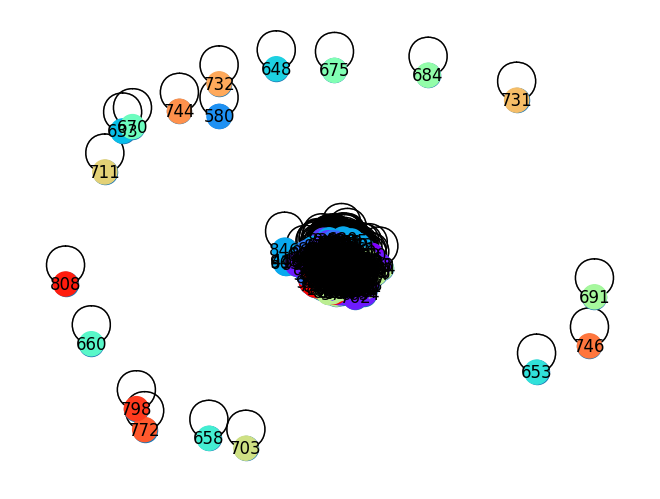

In [9]:
graph_community(G, community=louvain)

In [13]:
# # Visualize the graph
# nx.draw(G, with_labels=False)
# plt.show()

In [10]:
get_metrics(G, louvain)

{'modularity': 0.43051577540468683,
 'partition_quality': (0.6001197246333433, 0.8616816316822263),
 'ratio_cut': 0.2847278462128639}

## Girvan-Newman

In [18]:
G = nx.from_pandas_edgelist(edges, 'node_1', 'node_2')
comp = nx.community.girvan_newman(G)
node_groups = []
for com in next(comp):
  node_groups.append(list(com))
 
print(node_groups)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

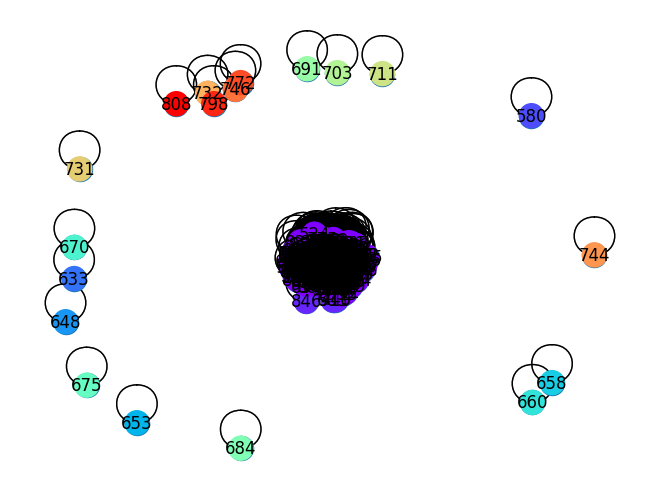

{'modularity': 0.0031091136300904557,
 'partition_quality': (0.9995211014666268, 0.08220649739351053),
 'ratio_cut': 0.037037037037037035}

In [20]:
graph_community(G, community=node_groups)
get_metrics(G, node_groups)

## k-Clique

In [11]:
cliques = list(nx.community.k_clique_communities(G, 3))
graph_community(G, community=cliques)

: 

In [43]:
get_metrics(G, cliques)

{'modularity': 0.9182888184698955,
 'partition_quality': (1.0, 0.958948651944181),
 'ratio_cut': 0.0}

# Influence Maximization

## words